<a href="https://colab.research.google.com/github/aditya17-creator/Login-Page/blob/master/AR_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import sklearn 
import io
import warnings
warnings.filterwarnings('ignore')

In [4]:
 from google.colab import files
 uploaded= files.upload()

Saving CarPrice_Prediction.csv to CarPrice_Prediction.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Prediction.csv']))
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [6]:
pip install openpyx1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement openpyx1 (from versions: none)
ERROR: No matching distribution found for openpyx1


In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [9]:
df[['company','model']] = df.CarName.str.split(" ",n=1,expand=True)

In [10]:
df.drop(["CarName"],axis=1,inplace=True)

In [11]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [12]:
first_column = df.pop('company')
df.insert(0, 'company', first_column)
second_column = df.pop('model')
df.insert(1, 'model', second_column)

In [13]:
df


,company,model,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,1,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,stelvio,2,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,3,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,100 ls,4,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,100ls,5,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,145e (sw),201,-1,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,144ea,202,-1,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,244dl,203,-1,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,246,204,-1,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
df["company"]=df["company"].str.lower()

def change(a,b):
    df['company'].replace(a,b,inplace=True)
    
change('maxda','mazda')
change('porcshce','porsche')
change('toyouta','toyota')
change('vokswagen','volkswagen')
change('vw','volkswagen')
change('Nissan','nissan')
df["company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

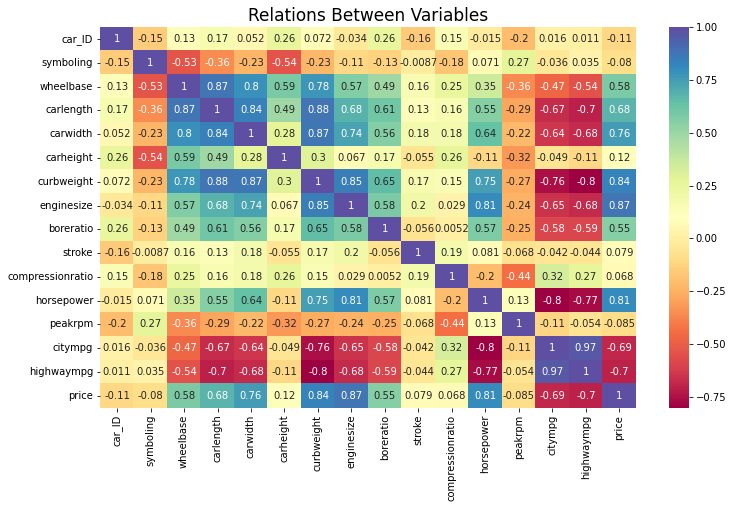

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral')
plt.title("Relations Between Variables", size=17)
plt.show()

In [17]:
df.columns

Index(['company', 'model', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [18]:
df.drop(['peakrpm', 'citympg', 'highwaympg','boreratio','car_ID', 'symboling','compressionratio','stroke','curbweight'],axis=1,inplace=True)


In [19]:
df.columns

Index(['company', 'model', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'horsepower', 'price'],
      dtype='object')

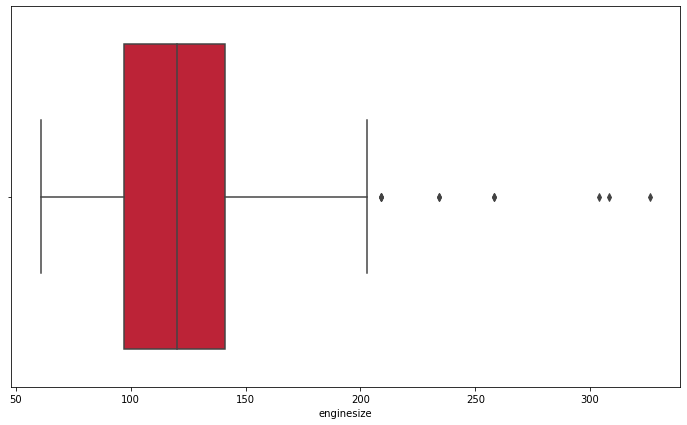

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(df['enginesize'],color="#D60924")
plt.show()

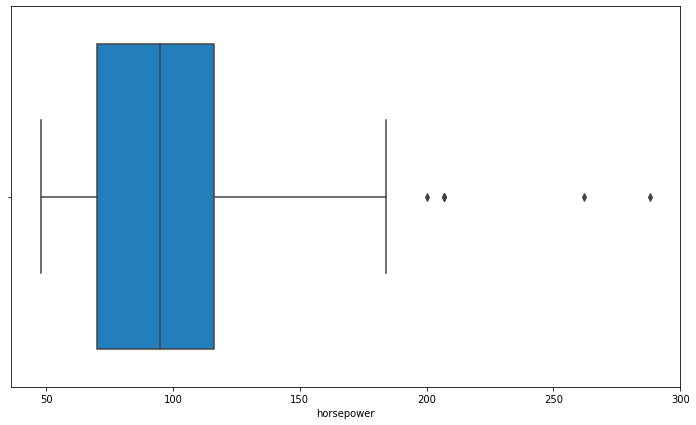

In [21]:
 plt.figure(figsize=(12,7))
sns.boxplot(df['horsepower'],color="#0984d6")
plt.show()

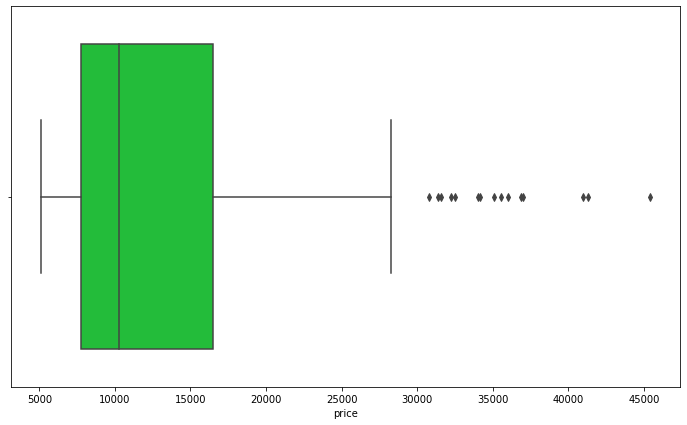

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(df['price'],color="#09D628")
plt.show()

In [23]:
pie=df["company"].value_counts().reset_index()
pie.columns=["company","count"]
pie.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
company,toyota,nissan,mazda,mitsubishi,honda,volkswagen,subaru,peugeot,volvo,dodge,...,audi,plymouth,saab,porsche,isuzu,jaguar,chevrolet,alfa-romero,renault,mercury
count,32,18,17,13,13,12,12,11,11,9,...,7,7,6,5,4,3,3,3,2,1


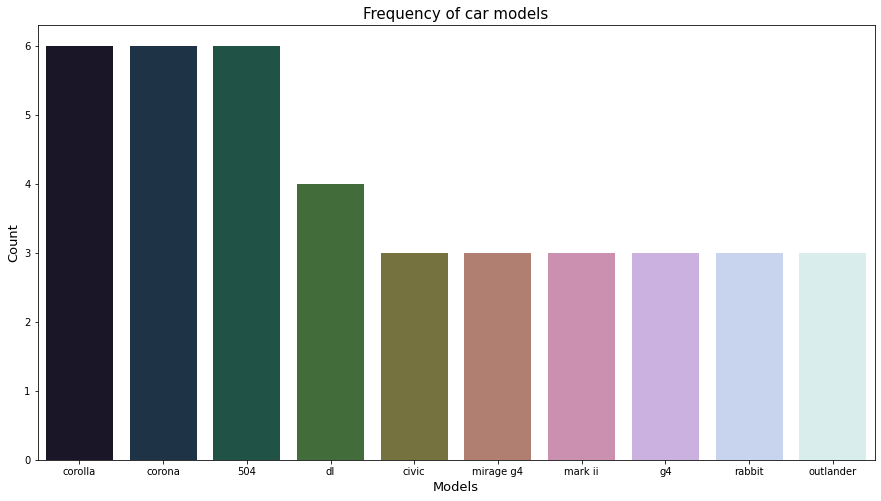

In [24]:
model=df["model"].value_counts().reset_index()
model.columns=["model","count"]
plt.figure(figsize=(15,8))
count_of_model = df['model'].value_counts()[0:10].sort_values(ascending=False)
sns.countplot(data=df, x='model',order=count_of_model.index,palette="cubehelix")
plt.title('Frequency of car models',size=15)
plt.xlabel('Models',size=13)
plt.ylabel('Count',size=13)
plt.show()

In [25]:
brand_count=df
px.treemap(brand_count,path=["company"],title=" The Most Purchased Brands:")

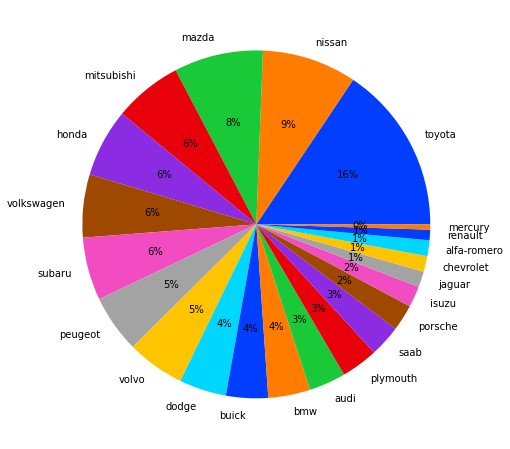

In [26]:
plt.figure(figsize=(14,8))
color=sns.color_palette("bright")
plt.pie(pie["count"],colors=color,autopct='%.0f%%',labels=pie["company"])
plt.show()

In [27]:
model=df["model"].value_counts().reset_index()
model.columns=["model","count"]
model


,model,count
0,corolla,6
1,corona,6
2,504,6
3,dl,4
4,civic,3
...,...,...
136,rx2 coupe,1
137,rx3,1
138,xk,1
139,xf,1


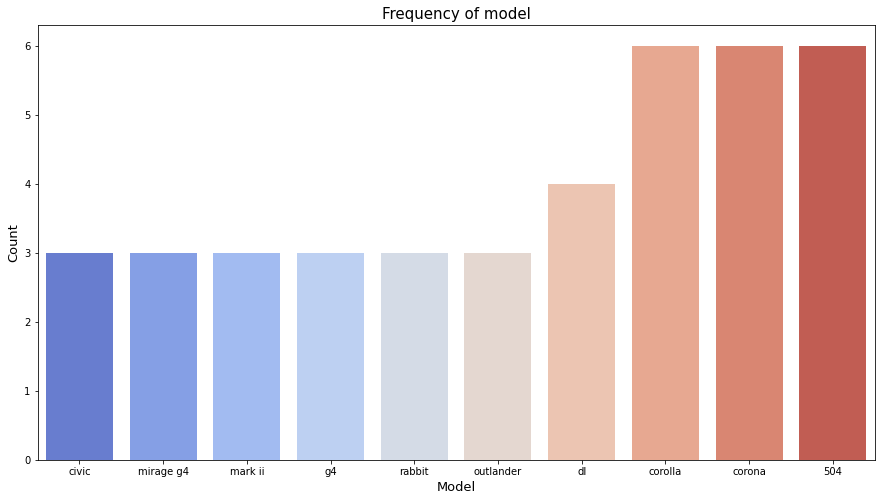

In [28]:
plt.figure(figsize=(15,8))
count_of_model = df['model'].value_counts()[0:10].sort_values()
sns.countplot(data=df, x='model',order=count_of_model.index,palette="coolwarm")
plt.title('Frequency of model',size=15)
plt.xlabel('Model',size=13)
plt.ylabel('Count',size=13)
plt.show()


In [29]:
fueltype=df['fueltype'].value_counts().reset_index()
fueltype.columns=["fueltype","count"]
fueltype

,fueltype,count
0,gas,185
1,diesel,20


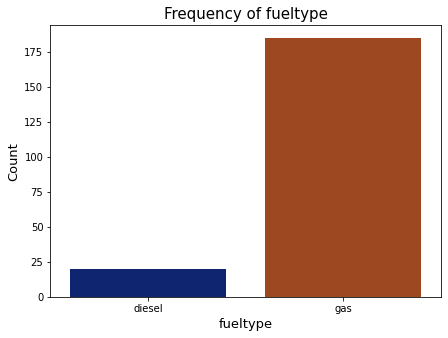

In [30]:
plt.figure(figsize=(7,5))
count_of_model = df['fueltype'].value_counts()[0:10].sort_values()
sns.countplot(data=df, x='fueltype',order=count_of_model.index,palette="dark")
plt.title('Frequency of fueltype',size=15)
plt.xlabel('fueltype',size=13)
plt.ylabel('Count',size=13)
plt.show()

In [31]:
drivewheel=df['drivewheel'].value_counts().reset_index()
drivewheel.columns=['drivewheel',"count"]
drivewheel

,drivewheel,count
0,fwd,120
1,rwd,76
2,4wd,9


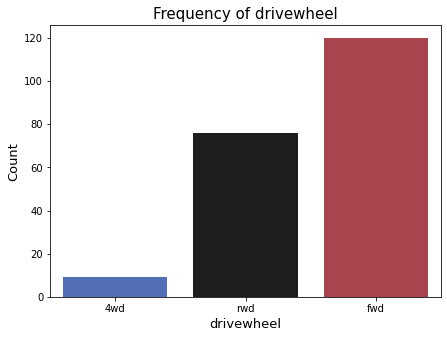

In [32]:
plt.figure(figsize=(7,5))
drivewheel = df['drivewheel'].value_counts()[0:10].sort_values()
sns.countplot(data=df, x='drivewheel',order=drivewheel.index,palette="icefire")
plt.title('Frequency of drivewheel',size=15)
plt.xlabel('drivewheel',size=13)
plt.ylabel('Count',size=13)
plt.show()

In [33]:
carbody=df['carbody'].value_counts().reset_index()
carbody.columns=['carbody',"count"]
carbody

,carbody,count
0,sedan,96
1,hatchback,70
2,wagon,25
3,hardtop,8
4,convertible,6


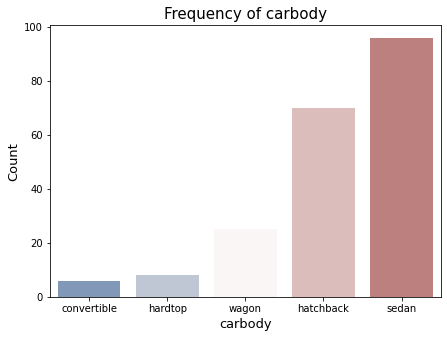

In [36]:
plt.figure(figsize=(7,5))
drivewheel = df['carbody'].value_counts()[0:10].sort_values()
sns.countplot(data=df, x='carbody',order=drivewheel.index,palette="vlag")
plt.title('Frequency of carbody',size=15)
plt.xlabel('carbody',size=13)
plt.ylabel('Count',size=13)
plt.show()

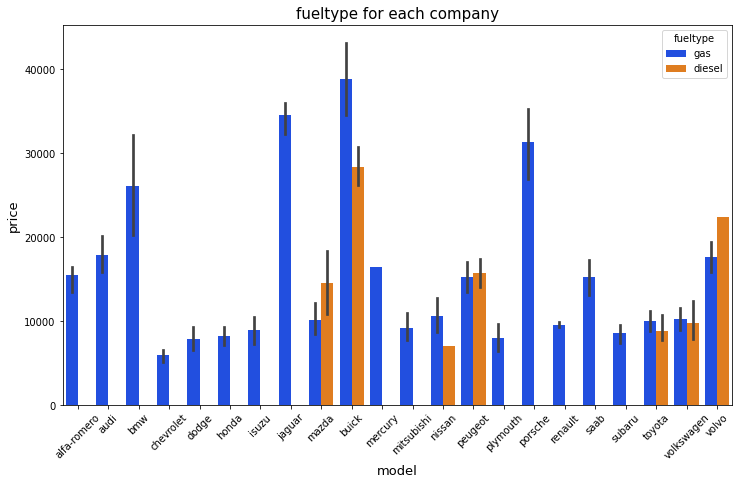

In [37]:
plt.figure(figsize=(12,7))
sns.barplot(x="company",y="price",data=df[0:10000],hue="fueltype",palette="bright")
plt.title("fueltype for each company",size=15)
plt.xlabel("model",size=13)
plt.ylabel("price" , size=13)
plt.xticks(rotation=45)
plt.show()

In [38]:
comvsfuel = pd.DataFrame(df.groupby(['company',"fueltype"])['price'].mean().sort_values(ascending = False))
comvsfuel.reset_index()

,company,fueltype,price
0,buick,gas,38900.000000
1,jaguar,gas,34600.000000
2,porsche,gas,31400.500000
3,buick,diesel,28394.000000
4,bmw,gas,26118.750000
5,volvo,diesel,22470.000000
6,audi,gas,17859.166714
7,volvo,gas,17622.500000
8,mercury,gas,16503.000000
9,peugeot,diesel,15797.000000


In [40]:
comvsprices = pd.DataFrame(df.groupby(['company'])['price'].mean().sort_values(ascending = False))
comvsprices.reset_index() 

,company,price
0,jaguar,34600.000000
1,buick,33647.000000
2,porsche,31400.500000
3,bmw,26118.750000
4,volvo,18063.181818
5,audi,17859.166714
6,mercury,16503.000000
7,alfa-romero,15498.333333
8,peugeot,15489.090909
9,saab,15223.333333


<Figure size 1440x432 with 0 Axes>

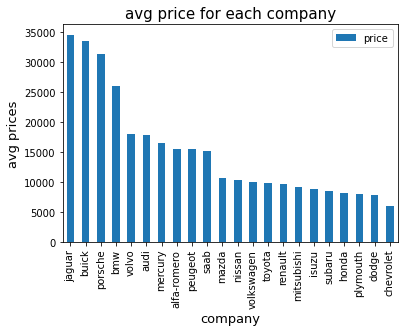

In [41]:
plt.figure(figsize=(20, 6))
comvsprices.plot.bar()
plt.title("avg price for each company",size=15)
plt.xlabel("company",size=13)
plt.ylabel("avg prices" , size=13)
plt.show()

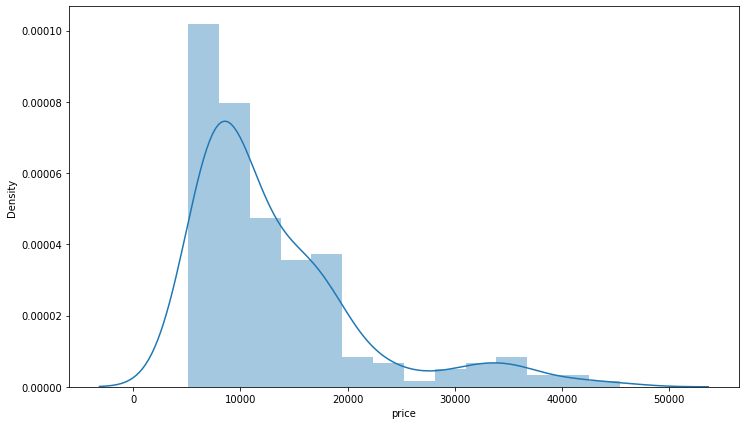

In [42]:
plt.figure(figsize=(12,7))
sns.distplot(df['price'],kde=True)
plt.show()

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

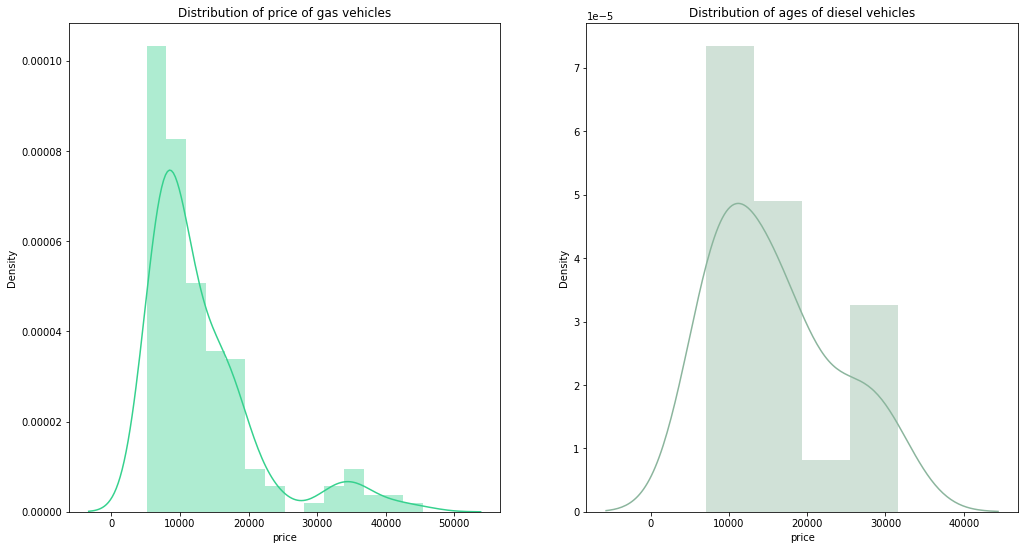

In [45]:
f= plt.figure(figsize=(17,9))

ax=f.add_subplot(121)
sns.distplot(df[(df.fueltype== 'gas')]["price"],color="#36D18E",ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df.fueltype == 'diesel')]['price'],color="#8BB59D",ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

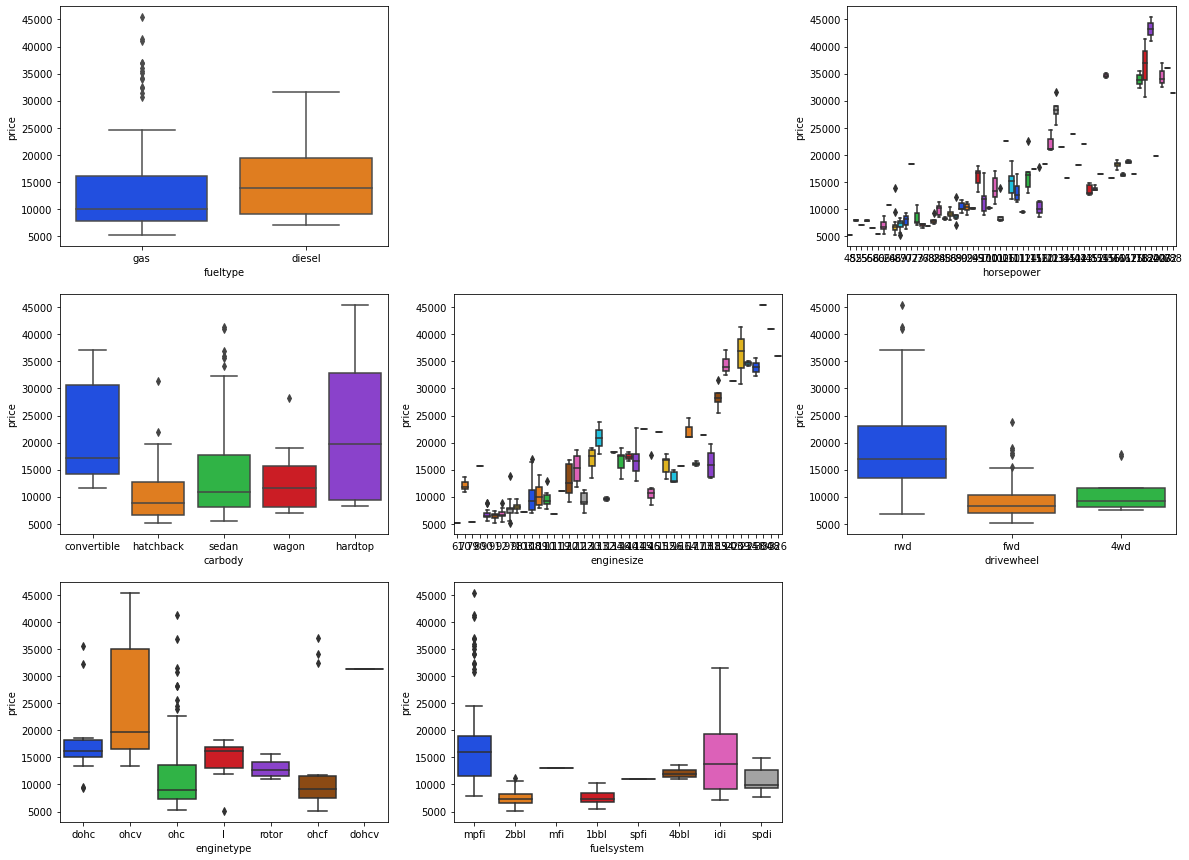

In [46]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', palette="bright",data =  df)
plt.subplot(3,3,3)
sns.boxplot(x = 'horsepower', y = 'price',palette="bright", data =  df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', palette="bright",data =  df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginesize', y = 'price', palette="bright",data =  df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price',palette="bright", data =  df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price',palette="bright", data =  df)
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price',palette="bright", data =  df)
plt.show()